In [1]:
import re
import string
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('df.csv')
df = df.rename(columns={'Unnamed: 0':'index'})
df = df.fillna('')

In [3]:
df.columns

Index(['index', 'adult', 'original_language', 'original_title', 'overview',
       'popularity', 'tagline', 'vote_average', 'vote_count', 'imdbId',
       'tmdbId', 'new_genres', 'new_production_companies',
       'new_production_countries', 'new_spoken_languages', 'new_keywords',
       'new_cast', 'combine_text'],
      dtype='object')

In [4]:
df = df[['index','original_title','imdbId','tmdbId','original_language','adult','popularity',
         'vote_average','vote_count','new_genres','new_production_companies','new_production_countries',
         'new_spoken_languages','new_cast','new_keywords','tagline','overview','combine_text']]

In [5]:
display(df.head(3))
df.shape

,index,original_title,imdbId,tmdbId,original_language,adult,popularity,vote_average,vote_count,new_genres,new_production_companies,new_production_countries,new_spoken_languages,new_cast,new_keywords,tagline,overview,combine_text
0,0,Toy Story,114709,862,en,False,21.946943,7.7,5415.0,"'Animation', 'Comedy', 'Family'",'Pixar Animation Studios','United States of America','English',"'Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim ...","'jealousy', 'toy', 'boy', 'friendship', 'frien...",,"Led by Woody, Andy's toys live happily in his ...","led by woody, andy's toys live happily in his ..."
1,1,Jumanji,113497,8844,en,False,17.015539,6.9,2413.0,"'Adventure', 'Fantasy', 'Family'","'TriStar Pictures', 'Teitler Film', 'Interscop...",'United States of America',"'English', 'Français'","'Robin Williams', 'Jonathan Hyde', 'Kirsten Du...","'board game', 'disappearance', ""based on child...",Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,when siblings judy and peter discover an encha...
2,2,Grumpier Old Men,113228,15602,en,False,11.712900,6.5,92.0,"'Romance', 'Comedy'","'Warner Bros.', 'Lancaster Gate'",'United States of America','English',"'Walter Matthau', 'Jack Lemmon', 'Ann-Margret'...","'fishing', 'best friend', 'duringcreditsstinge...",Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...


(46910, 18)

# EDA

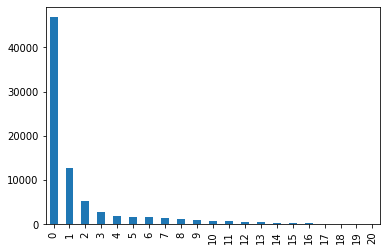

In [6]:
df['original_language'].value_counts()[0:10].plot(kind='bar');
df['adult'].value_counts()[0:10].plot(kind='bar');
round(df['popularity']).astype('int').value_counts()[0:21].plot(kind='bar');
#round(df['vote_average']).astype('int').value_counts().plot(kind='bar');

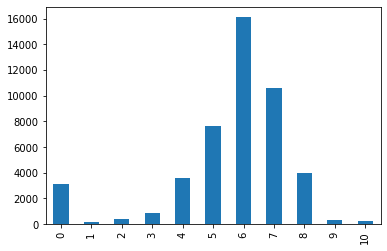

In [7]:
round(df['vote_average']).astype('int').value_counts().sort_index().plot(kind='bar')

In [8]:
df['new_genres'] = df['new_genres'].apply( lambda x: re.sub('[%s]'%re.escape(string.punctuation),'',x))
df['new_genres'] = df['new_genres'].apply( lambda x: x.lower())

In [9]:
genres = [text for text in df['new_genres']]
genres = ' '.join(genres).split()

In [10]:
count_genre = Counter(genres)
top_genre = count_genre.most_common(20)
pd.DataFrame(top_genre);

In [11]:
genre_words = [word[0] for word in top_genre]
genre_counts = [word[1] for word in top_genre]

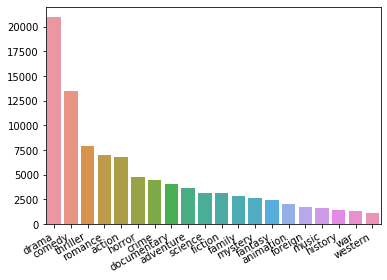

In [12]:
sns.barplot(x=genre_words, y=genre_counts)

plt.xticks(rotation=30, ha='right')

plt.show()

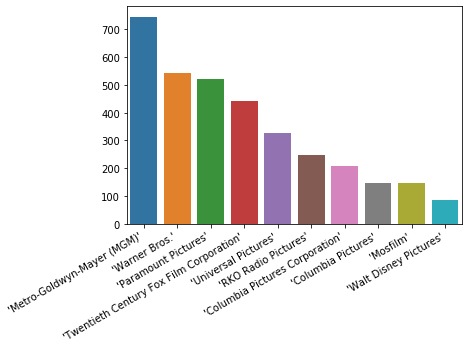

In [13]:

production_companies = [text for text in df['new_production_companies']]
#production_companies = ' '.join(production_companies).split()

count_production_companies = Counter(production_companies)
top_production_companies = count_production_companies.most_common(20)
pd.DataFrame(top_production_companies);

production_companies_words = [word[0] for word in top_production_companies]
production_companies_counts = [word[1] for word in top_production_companies]

sns.barplot(x=production_companies_words[1:11], y=production_companies_counts[1:11])

plt.xticks(rotation=30, ha='right')

plt.show()

In [14]:
#production_countries = [text for text in df['new_production_countries']]
#production_countries = (' ').join(production_countries).split("")
#
#count_production_countries = Counter(production_countries)
#top_production_countries = count_production_countries.most_common(20)
#pd.DataFrame(top_production_countries);
#
#production_countries_words = [word[0] for word in top_production_countries]
#production_countries_counts = [word[1] for word in top_production_countries]
#
#sns.barplot(x=production_countries_words[0:11], y=production_countries_counts[0:11])

#plt.xticks(rotation=30, ha='right')
#
#plt.show()

/Users/austinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/austinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/austinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/austinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/austinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/austinyu/opt/anaconda3/lib/python3.7/site-p

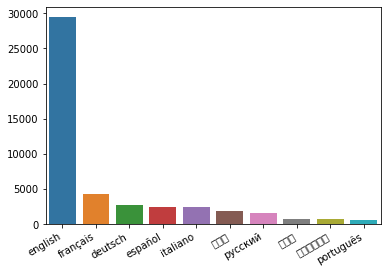

In [15]:
df['new_spoken_languages'] = df['new_spoken_languages'].apply( lambda x: re.sub('[%s]'%re.escape(string.punctuation),'',x))
df['new_spoken_languages'] = df['new_spoken_languages'].apply( lambda x: x.lower())

spoken_languages = [text for text in df['new_spoken_languages']]
spoken_languages = ' '.join(spoken_languages).split()

count_spoken_languages = Counter(spoken_languages)
top_spoken_languages = count_spoken_languages.most_common(20)
pd.DataFrame(top_spoken_languages);

spoken_languages_words = [word[0] for word in top_spoken_languages]
spoken_languages_counts = [word[1] for word in top_spoken_languages]

sns.barplot(x=spoken_languages_words[0:10], y=spoken_languages_counts[0:10])

plt.xticks(rotation=30, ha='right')

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

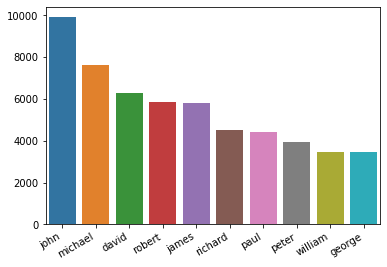

In [16]:
df['new_cast'] = df['new_cast'].apply( lambda x: re.sub('[%s]'%re.escape(string.punctuation),'',x))
df['new_cast'] = df['new_cast'].apply( lambda x: x.lower())

cast = [text for text in df['new_cast']]
cast = ' '.join(cast).split()

count_cast = Counter(cast)
top_cast = count_cast.most_common(20)
pd.DataFrame(top_cast);

cast_words = [word[0] for word in top_cast]
cast_counts = [word[1] for word in top_cast]

sns.barplot(x=cast_words[0:10], y=cast_counts[0:10])

plt.xticks(rotation=30, ha='right')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

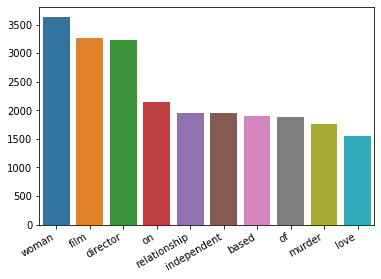

In [17]:

df['new_keywords'] = df['new_keywords'].apply( lambda x: re.sub('[%s]'%re.escape(string.punctuation),'',x))
df['new_keywords'] = df['new_keywords'].apply( lambda x: x.lower())

keywords = [text for text in df['new_keywords']]
keywords = ' '.join(keywords).split()

count_keywords = Counter(keywords)
top_keywords = count_keywords.most_common(20)
pd.DataFrame(top_keywords);

keywords_words = [word[0] for word in top_keywords]
keywords_counts = [word[1] for word in top_keywords]

sns.barplot(x=keywords_words[0:10], y=keywords_counts[0:10])

plt.xticks(rotation=30, ha='right')


# Recommendation_Engine

In [18]:
count_matrix = CountVectorizer().fit_transform(df['combine_text'])

In [19]:
cosine_sm = cosine_similarity(count_matrix)

In [20]:
print(cosine_sm)

[[1.         0.16485188 0.21282286 ... 0.14783528 0.26041025 0.25624782]
 [0.16485188 1.         0.18143706 ... 0.14833167 0.25499704 0.24431098]
 [0.21282286 0.18143706 1.         ... 0.1013799  0.39233396 0.38299072]
 ...
 [0.14783528 0.14833167 0.1013799  ... 1.         0.08457855 0.16901408]
 [0.26041025 0.25499704 0.39233396 ... 0.08457855 1.         0.57513412]
 [0.25624782 0.24431098 0.38299072 ... 0.16901408 0.57513412 1.        ]]


In [21]:
cosine_sm.shape

(46910, 46910)

In [22]:
def get_title_from_index(index):
    return df[df.index == index]['original_title'].values[0]

def get_index_from_title(title):
    return df[df.original_title == title]['index'].values[0]

In [23]:
movie_user_likes = 'Toy Story'

movie_index = get_index_from_title(movie_user_likes)
print(movie_index)

0


In [24]:
similar_movies = list(enumerate(cosine_sm[movie_index]))

In [25]:
similar_movies[1:10]

[(1, 0.16485187793561917),
 (2, 0.212822859278557),
 (3, 0.19795189561622395),
 (4, 0.19113629903539223),
 (5, 0.12233754573222991),
 (6, 0.09302954520619311),
 (7, 0.2491364395612199),
 (8, 0.1651685910387792),
 (9, 0.1754656015858991)]

In [26]:
sorted_similar_movies = sorted(similar_movies, key = lambda x: x[1], reverse = True)[1:10]

In [27]:
sorted_similar_movies

[(3056, 0.5550906593973836),
 (15745, 0.4850583336112524),
 (26275, 0.41108939946131423),
 (24999, 0.3898927605111518),
 (23194, 0.38701462788131846),
 (26273, 0.3802108336180528),
 (22392, 0.3729349269914458),
 (2038, 0.35763065657235854),
 (23131, 0.3527909248536153)]

In [28]:
i = 0 
print(movie_user_likes)
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i = i + 1
    if i == 5:
        break

Toy Story
Toy Story 2
Toy Story 3
Toy Story That Time Forgot
Small Fry
La luna
